**COMPETICAO ML PARA PREDICAO DE VINHOS - NEURON**
# Requisitos de Instalação
- Basta rodar o arquivo `install.bat` no cmd ou terminal, ele já contem todas as dependencias utilizadas no projeto

# Dependências Utilizadas
* Conforme requisitado no MarkDown de Explicação do projeto, as dependências utilizadas são:
* Pandas (Tratamento de dados e arquivos)
* Numpy (Funções matemáticas)
* Matplotlib (Vizualização de dados)
* Seaborn (Vizualização de dados)
* Scikit-learn (Machine Learning) #tive que substituir o sklearn por scikit-learn 



Parte 1) Importação 


In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Parte 2) Leitura e Analise de Dados do `Train.csv`

In [148]:
train = pd.read_csv("train.csv",na_values = '-', index_col= 0) #Usa a coluna Id do CSV como a coluna Id do Data Structure do Pandas
matriz_treinamento = train.values
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
id,,,,,,,,,,,,
0,9.3,0.40,0.34,2.1,0.088,14.0,28.0,0.99940,3.44,0.84,12.2,7.0
1,8.3,0.38,0.33,1.8,0.070,5.0,15.0,0.99820,3.39,0.55,9.9,5.0
2,6.6,0.28,0.30,2.1,0.068,8.0,17.0,0.99552,3.51,0.80,10.7,6.0
3,8.2,0.35,0.36,2.6,0.086,14.0,89.0,0.99910,3.23,0.67,9.5,5.0
4,10.9,0.18,0.49,1.8,0.084,21.0,77.0,0.99658,3.20,0.63,9.5,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,8.2,0.30,0.49,3.0,0.075,8.0,21.0,0.99656,3.47,0.52,9.8,5.0
14996,7.3,0.50,0.00,2.1,0.084,24.0,42.0,0.99562,3.39,0.56,12.6,7.0
14997,8.0,0.56,0.12,2.2,0.071,23.0,40.0,0.99702,3.19,0.60,9.8,6.0


In [149]:
print("Shape:", train.shape)

Shape: (15000, 12)


In [150]:
print("\nTipos de dados:\n", train.dtypes)


Tipos de dados:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                 float64
dtype: object


In [151]:
print("\nValores nulos por coluna:\n", train.isnull().sum())
print("\nExistem nulos no dataframe?:", train.isnull().any().any())


Valores nulos por coluna:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Existem nulos no dataframe?: False


In [152]:
print("\nEstatísticas descritivas:\n", train.describe().T)


Estatísticas descritivas:
                         count       mean        std      min      25%  \
fixed acidity         15000.0   8.141927   1.381534  4.60000   7.2000   
volatile acidity      15000.0   0.505266   0.134270  0.12000   0.4000   
citric acid           15000.0   0.231299   0.176764  0.00000   0.0500   
residual sugar        15000.0   2.189266   0.505553  1.10000   1.9000   
chlorides             15000.0   0.078641   0.013768  0.01200   0.0730   
free sulfur dioxide   15000.0  13.234033   7.916878  1.00000   6.0000   
total sulfur dioxide  15000.0  37.178500  24.034172  5.00000  20.0000   
density               15000.0   0.996915   0.001399  0.99064   0.9959   
pH                    15000.0   3.320703   0.115140  2.88000   3.2400   
sulphates             15000.0   0.618600   0.105734  0.39000   0.5500   
alcohol               15000.0  10.187160   0.912091  6.40000   9.5000   
quality               15000.0   5.660600   0.804892  3.00000   5.0000   

                      

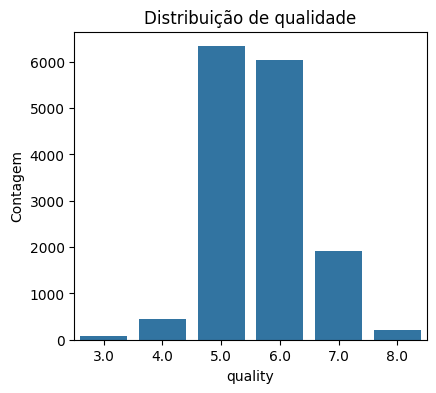

In [153]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x='quality', data=train, stat = 'count')
plt.title('Distribuição de qualidade')
plt.xlabel('quality')
plt.ylabel('Contagem')
plt.show()

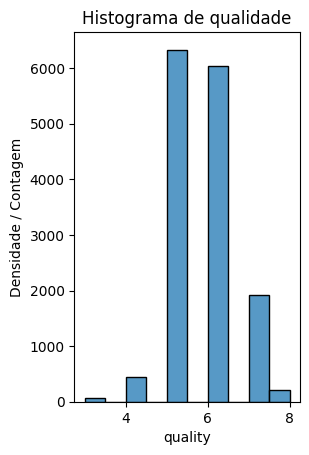

In [154]:
plt.subplot(1,2,2)
sns.histplot(train['quality'], bins=10)
plt.title('Histograma de qualidade')
plt.xlabel('quality')
plt.ylabel('Densidade / Contagem')
plt.show()
# histograma coluna qualidade

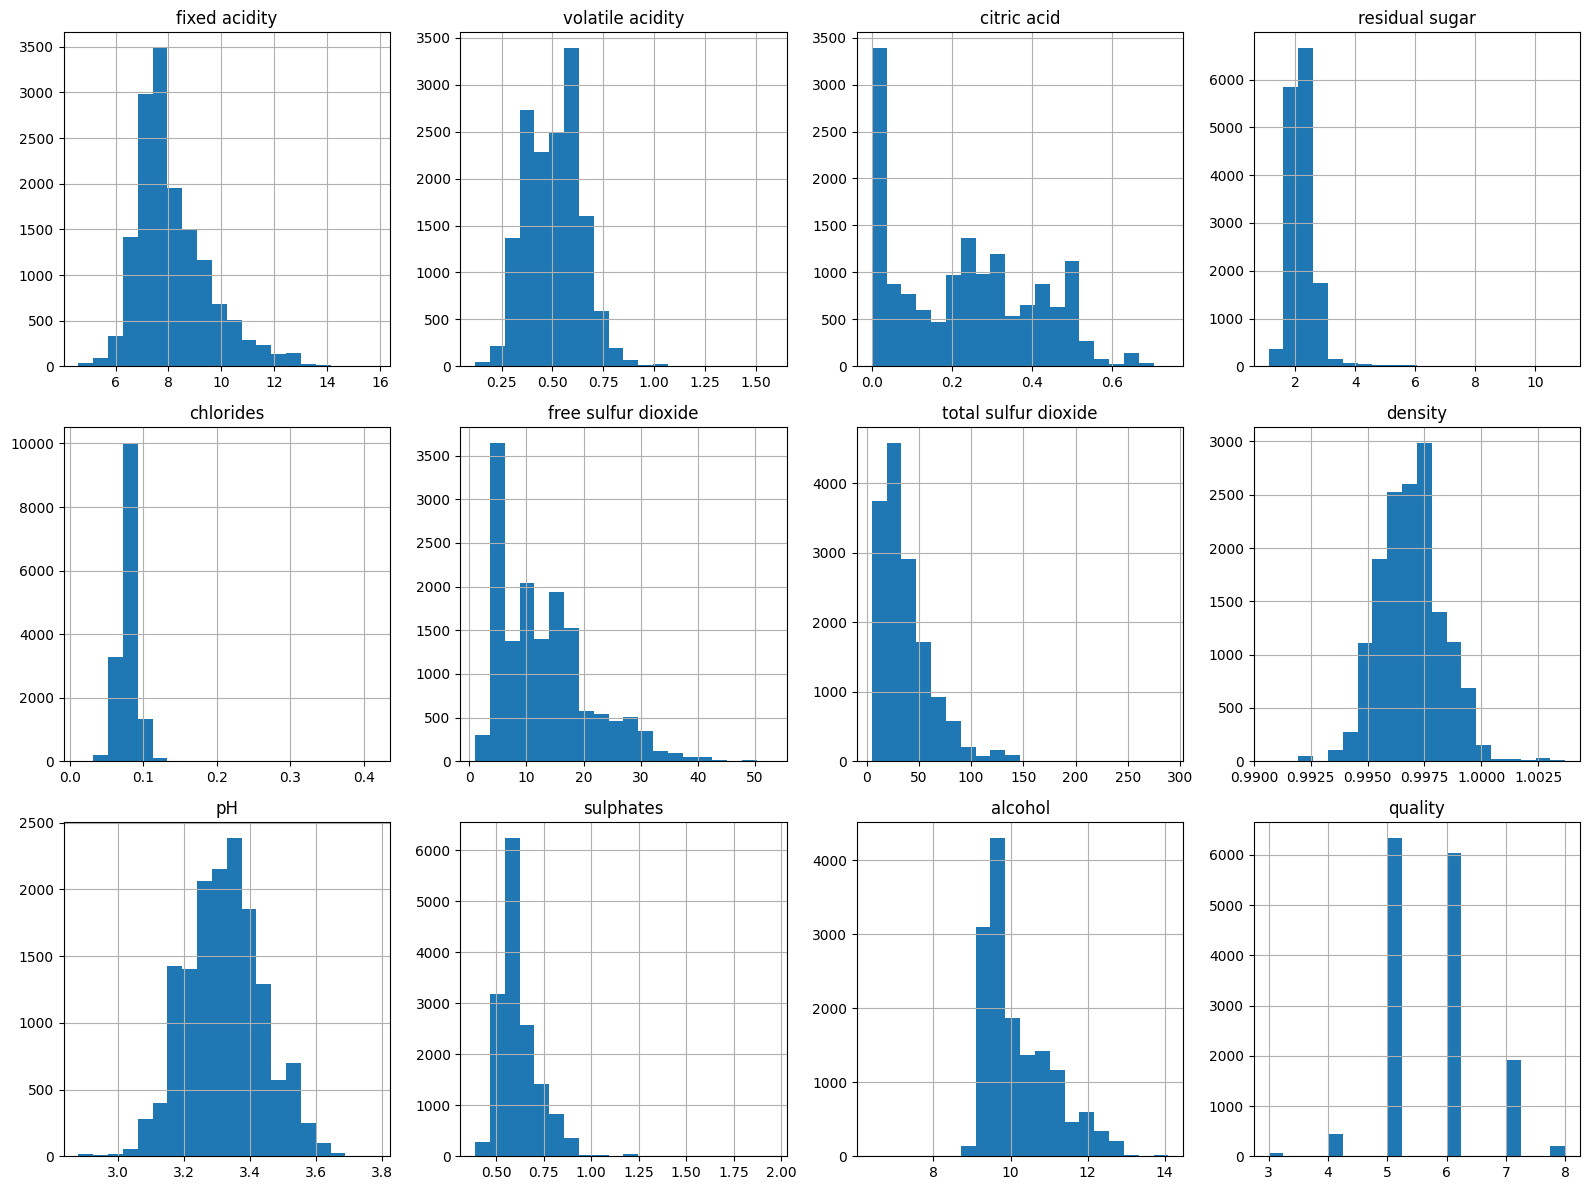

In [155]:
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()
train[num_cols].hist(bins=20, figsize=(16,12), layout=(int(np.ceil(len(num_cols)/4)),4))
plt.tight_layout()
plt.show() # histograma de todas as colunas

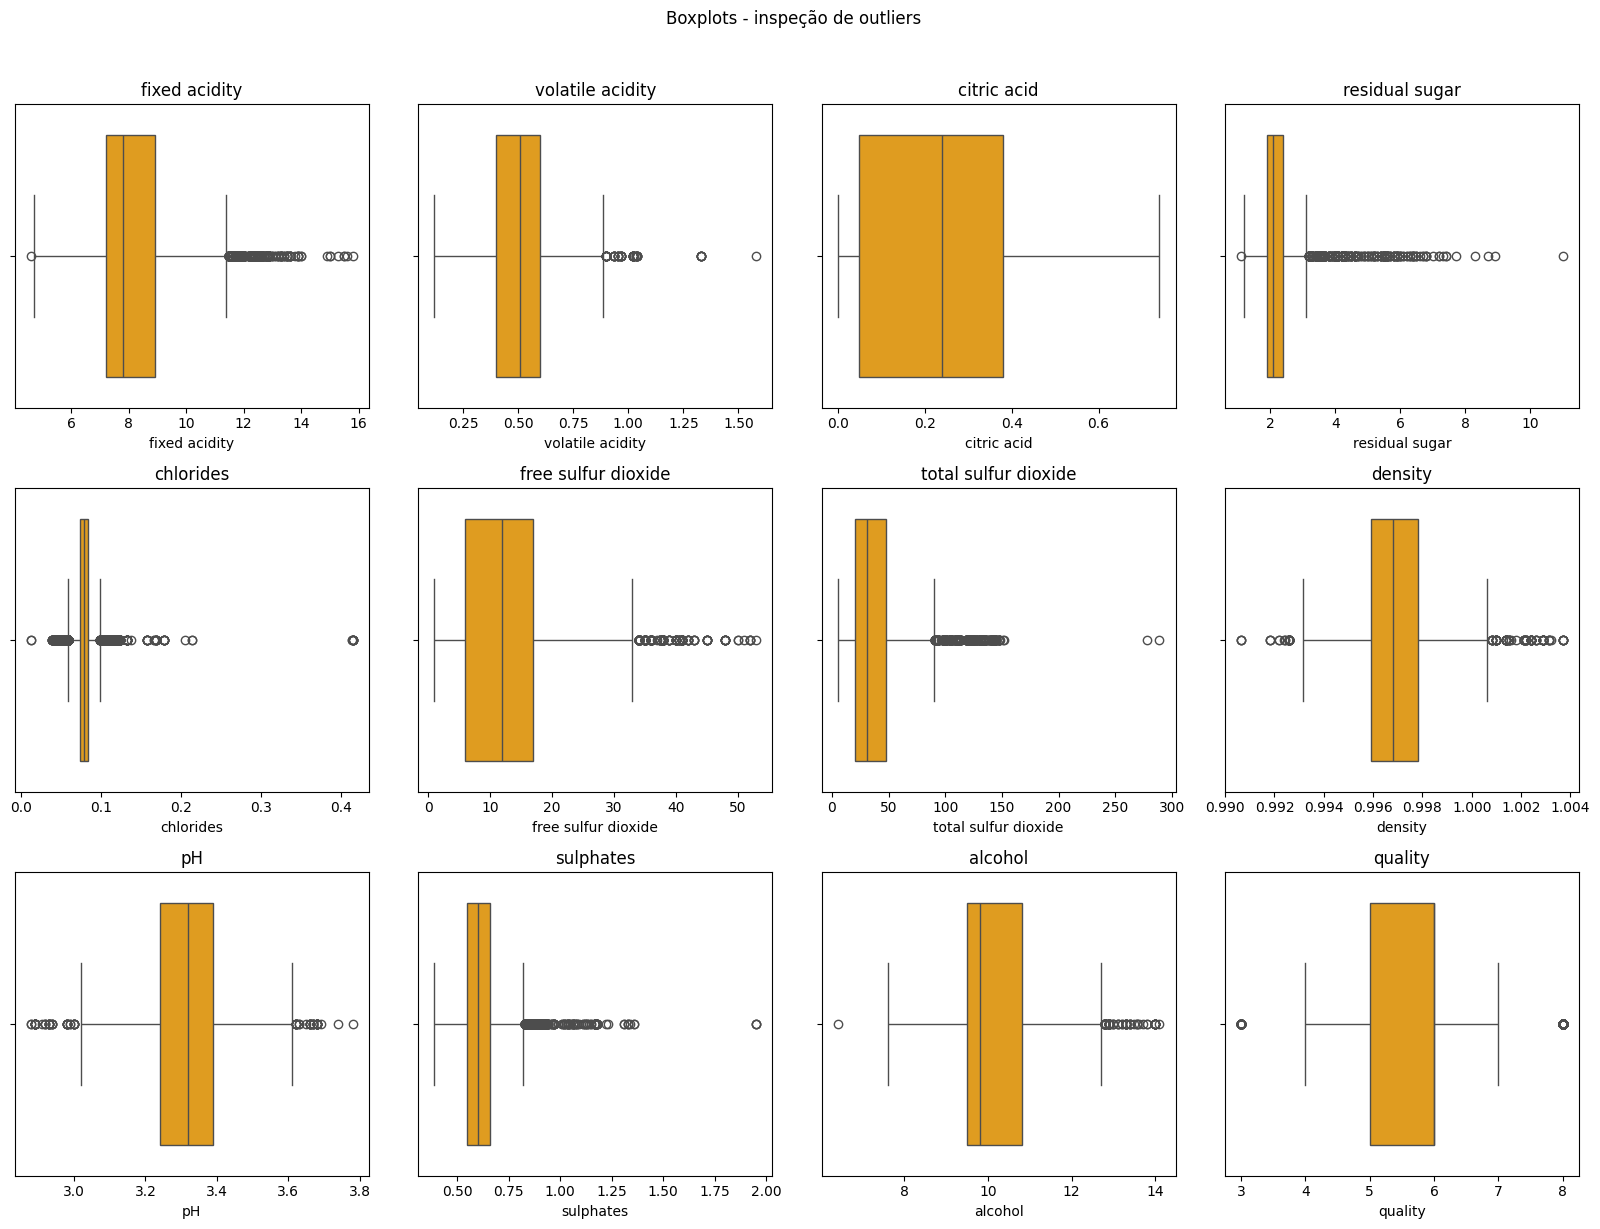

In [156]:
#Boxplots para checar outliers por coluna
plt.figure(figsize=(16,12))
cols_per_row = 4
rows = int(np.ceil(len(num_cols)/cols_per_row))
for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(x=train[col], color='orange')
    plt.title(col)
plt.suptitle('Boxplots - inspeção de outliers', y=1.02)
plt.tight_layout()
plt.show()

In [157]:
corr = train.corr()
corr # matriz de correlação entre colunas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.329676,0.614170,0.078495,0.063450,-0.076970,-0.042442,0.231440,-0.416242,0.175203,0.015599,0.018961
volatile acidity,-0.329676,1.000000,-0.652072,-0.047780,-0.061987,-0.005457,-0.022740,-0.087448,0.270058,-0.178959,-0.038275,-0.006902
citric acid,0.614170,-0.652072,1.000000,0.084218,0.086849,-0.016098,0.017695,0.187581,-0.454106,0.227912,0.053732,0.014829
residual sugar,0.078495,-0.047780,0.084218,1.000000,0.020045,-0.000917,0.014330,0.050680,-0.032189,0.023479,0.086110,0.022257
chlorides,0.063450,-0.061987,0.086849,0.020045,1.000000,0.013284,0.029108,0.050609,-0.044829,0.026760,-0.029173,-0.001797
free sulfur dioxide,-0.076970,-0.005457,-0.016098,-0.000917,0.013284,1.000000,0.714827,-0.005474,0.017377,-0.010333,-0.052947,-0.025582
total sulfur dioxide,-0.042442,-0.022740,0.017695,0.014330,0.029108,0.714827,1.000000,0.035861,-0.011907,-0.016905,-0.155936,-0.081557
density,0.231440,-0.087448,0.187581,0.050680,0.050609,-0.005474,0.035861,1.000000,-0.077937,0.040620,-0.087073,-0.035284
pH,-0.416242,0.270058,-0.454106,-0.032189,-0.044829,0.017377,-0.011907,-0.077937,1.000000,-0.102917,-0.000964,0.006518
sulphates,0.175203,-0.178959,0.227912,0.023479,0.026760,-0.010333,-0.016905,0.040620,-0.102917,1.000000,0.065947,0.063442


<Axes: >

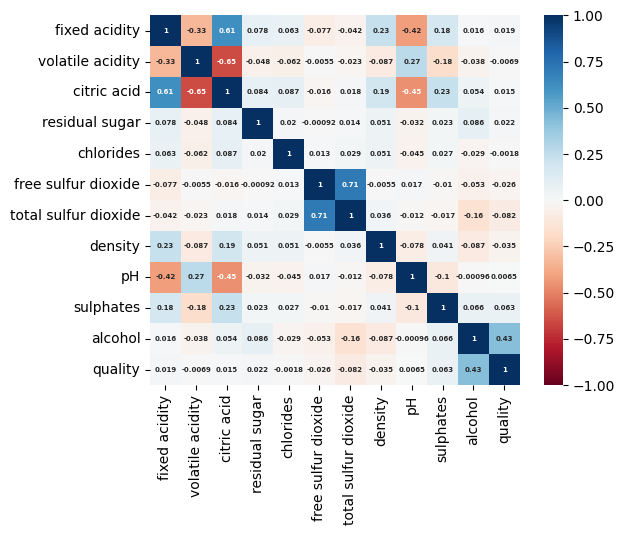

In [158]:
sns.heatmap(corr,cmap = 'RdBu', vmin = -1.0, vmax = 1.0,annot=True,square=True, annot_kws = {'fontsize' : 5, 'fontweight' : 'bold'}) 
# Função do seaborn pra criação do heatmap